<a href="https://colab.research.google.com/github/laresamdeola/Computer-Vision/blob/main/Heart_Disease_Computer_Vision_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
!pip install --upgrade tensorflow keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
import os
import shutil

In [ ]:
os.getcwd()

'/content'

Folder Structure

In [ ]:
# --content
#   --Parkinson_Data
#     --test_data
#       --control
#       --pd
#     --train_data
#       --control
#       --pd


# --content
#   --Heart_Disease_Data
#     --test_data
#       --class1
#       --class2
#     --train_data
#       --class1
#       --class2

In [ ]:
os.listdir('Heart_Disease_Data')

['train_data', 'test_data']

In [ ]:
# import shutil

# def remove_checkpoints(directory='.'):
#     for root, dirs, files in os.walk(directory):
#         if '.ipynb_checkpoints' in dirs:
#             dir_path = os.path.join(root, '.ipynb_checkpoints')
#             shutil.rmtree(dir_path)
#             print(f"Removed {dir_path}")

# remove_checkpoints()

In [ ]:
# # Uncomment and Run this cell once

# shutil.rmtree('Heart_Disease_Data/.ipynb_checkpoints')
# shutil.rmtree('Heart_Disease_Data/train_data/.ipynb_checkpoints')
# shutil.rmtree('Heart_Disease_Data/test_data/.ipynb_checkpoints')

In [ ]:
os.listdir('Heart_Disease_Data')

['train_data', 'test_data']

In [ ]:
os.listdir('Heart_Disease_Data/train_data')
os.listdir('Heart_Disease_Data/test_data')

['class2', 'class1']

In [ ]:
os.listdir('Heart_Disease_Data/train_data')
os.listdir('Heart_Disease_Data/test_data')

['class2', 'class1']

Image Augmentation - for preventing overfitting

In [ ]:
# Image size increased to 124x124 because of the InceptionV3 Model (min. image size - 75x75) and Xception (min. image size 71x71)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_set = train_datagen.flow_from_directory(
    'Heart_Disease_Data/train_data',
    target_size=(128,128),
    batch_size=2,
    class_mode='binary'
)

Found 265 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'class1': 0, 'class2': 1}

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

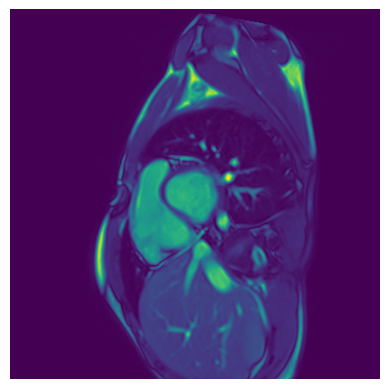

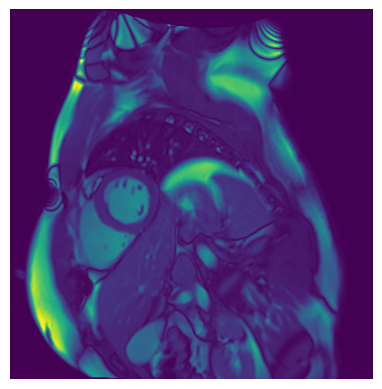

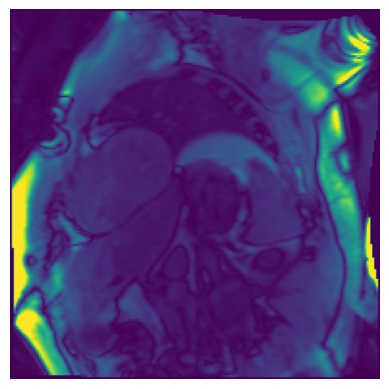

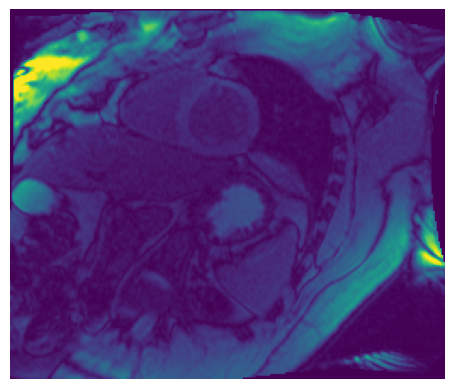

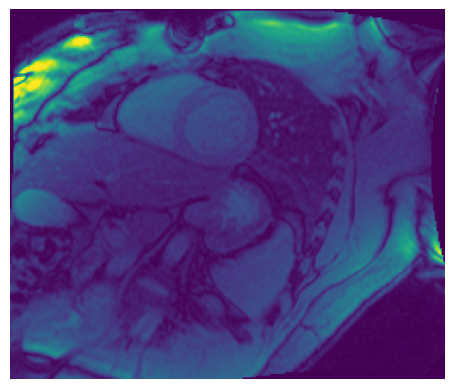

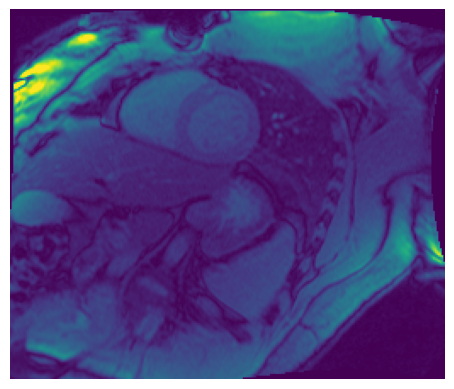

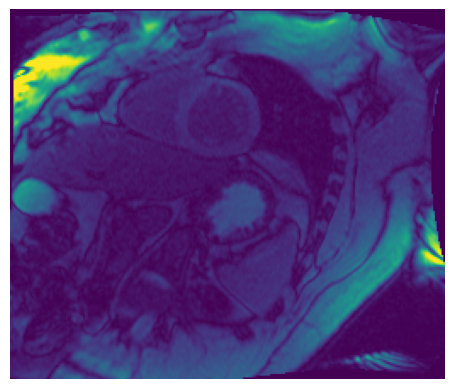

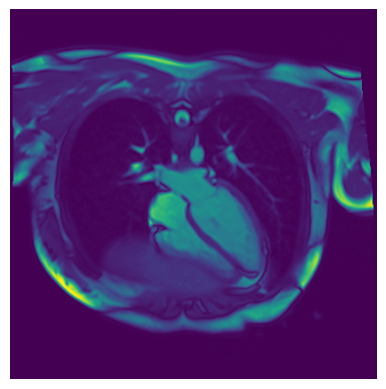

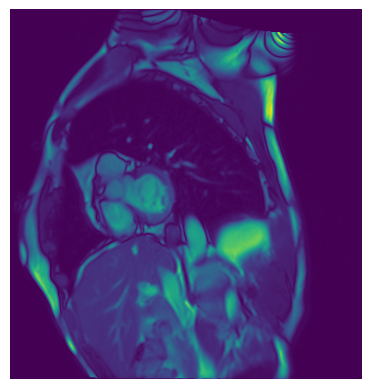

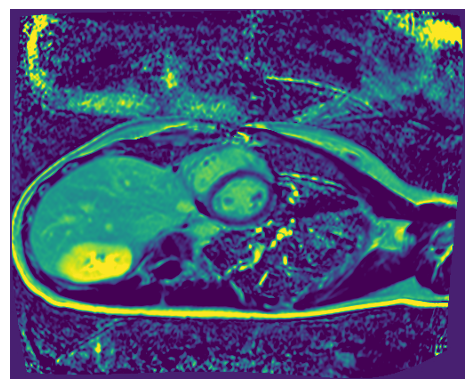

In [ ]:
for i in range(0, 10):
  image_path = train_set.filenames[i]
  image = mpimg.imread('/content/Heart_Disease_Data/train_data/' + image_path)
  plt.imshow(image)
  # plt.colorbar()
  plt.grid(False)
  plt.axis('off')
  plt.show()

In [ ]:
print(train_set.labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_set = test_datagen.flow_from_directory(
    'Heart_Disease_Data/test_data',
    target_size=(128,128),
    batch_size=2,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
test_set.filenames[0]

'class1/img0001--100.251.jpg'

CNN Model - using the Keras Sequential Class

In [ ]:
cnn = tf.keras.models.Sequential()























  Add the Convolutional Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation='relu',
                               input_shape=[128,128,3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Add the Pooling Layer

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Flatten the layer

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compile the Neural Network

In [ ]:
cnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Train the Neural Network

In [ ]:
cnn.fit(x=train_set, validation_data=test_set, epochs=32)

Epoch 1/32


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5161 - loss: 1.9398 - val_accuracy: 0.5667 - val_loss: 0.7401
Epoch 2/32
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6489 - loss: 0.6422 - val_accuracy: 0.6833 - val_loss: 0.7010
Epoch 3/32
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7744 - loss: 0.5338 - val_accuracy: 0.6500 - val_loss: 1.0358
Epoch 4/32
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7773 - loss: 0.5288 - val_accuracy: 0.7167 - val_loss: 0.8003
Epoch 5/32
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8201 - loss: 0.4058 - val_accuracy: 0.6833 - val_loss: 0.8322
Epoch 6/32
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7654 - loss: 0.4247 - val_accuracy: 0.6167 - val_loss: 2.0581
Epoch 7/32
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8676 - loss: 0.3766 - val_accuracy: 0.7000 - val_loss: 1.1109
Epoch 8/32
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8541 - loss: 0.5470 - val_accuracy: 0.76

In [ ]:
print(cnn.input_shape)

(None, 128, 128, 3)


In [ ]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_293 (Conv2D)                  │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │      16,257,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,516,356 (124.04 MB)

 Trainable params: 16,258,177 (62.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,258,179 (62.02 MB)

In [ ]:
print(train_set.num_classes)

2


In [ ]:
loss, accuracy = cnn.evaluate(test_set)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7125 - loss: 2.5538


In [ ]:
print(f'Validation loss: {loss}')

Validation loss: 1.7621195316314697


In [ ]:
print(f'Validation accuracy: {accuracy}')

Validation accuracy: 0.7833333611488342


In [ ]:
# What caused the error was the steps argument in y_pred_prob, we were meant to
# have 7 classes but in the previous code, it had 6 classes and thats because
# we used the floor division (which rounds floats down) in validation_steps
# eg try test_set.samples / test_set.batch_size versus test_set.samples / test_set.batch_size
# i've shown this in the next cells below.

validation_steps = max(1, test_set.samples // test_set.batch_size)
y_true = test_set.classes
y_pred_prob = cnn.predict(test_set, steps=validation_steps)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
print(validation_steps, y_true)

30 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print(test_set.samples / test_set.batch_size)

30.0


In [ ]:
print(test_set.samples // test_set.batch_size)

30


In [ ]:
print(len(test_set))

30


In [ ]:
print(y_pred_prob)

[[7.26816495e-07]
 [9.98627424e-01]
 [1.00000000e+00]
 [9.98462915e-01]
 [9.99337137e-01]
 [9.90668476e-01]
 [9.99989152e-01]
 [1.02006965e-07]
 [1.36479821e-05]
 [3.20671223e-09]
 [1.00000000e+00]
 [9.00447594e-06]
 [9.99999523e-01]
 [9.86971438e-01]
 [1.00000000e+00]
 [5.28736052e-07]
 [7.26120997e-10]
 [4.90666707e-06]
 [9.97999012e-01]
 [9.99989867e-01]
 [3.28893257e-05]
 [9.93768871e-01]
 [9.76382010e-03]
 [7.88819790e-01]
 [3.50629911e-02]
 [1.00000000e+00]
 [9.99604046e-01]
 [8.81175405e-15]
 [7.51404345e-01]
 [6.77513123e-01]
 [2.23941043e-09]
 [1.00000000e+00]
 [9.77032166e-03]
 [9.80004251e-01]
 [4.31377364e-11]
 [9.90434766e-01]
 [9.66255307e-01]
 [9.99970078e-01]
 [9.99999046e-01]
 [2.53227307e-04]
 [9.70725715e-03]
 [9.99923706e-01]
 [3.18996198e-02]
 [1.27092674e-02]
 [3.42334533e-04]
 [2.46158656e-04]
 [7.86346078e-01]
 [9.99962211e-01]
 [1.15940347e-04]
 [1.00000000e+00]
 [1.19827804e-04]
 [1.00000000e+00]
 [9.99998212e-01]
 [6.53794929e-02]
 [9.99999404e-01]
 [1.000000

In [ ]:
print(len(y_pred_prob > 0.5))

60


In [ ]:
print(y_pred)

[0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1
 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0]


In [ ]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print(test_set.class_indices)

{'class1': 0, 'class2': 1}


Precision, Recall, and f1

In [ ]:
print(len(y_true))
print(len(y_pred))

60
60


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1: {f1}')

Precision: 0.45454545454545453
Recall: 0.5
f1: 0.47619047619047616


Classification Report

In [ ]:
report = classification_report(y_true, y_pred, target_names=test_set.class_indices.keys())
print(report)

              precision    recall  f1-score   support

      class1       0.44      0.40      0.42        30
      class2       0.45      0.50      0.48        30

    accuracy                           0.45        60
   macro avg       0.45      0.45      0.45        60
weighted avg       0.45      0.45      0.45        60



In [ ]:
import tensorflow

In [ ]:
from keras.applications import ResNet50, VGG16, InceptionV3, Xception
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

ResNet50

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
resnet50_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

resnet50_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# resnet50_model.summary()

In [ ]:
print(resnet50_model.input)

<KerasTensor shape=(None, 128, 128, 3), dtype=float32, sparse=False, name=keras_tensor_1876>


In [ ]:
steps_per_epoch = max(1, train_set.samples // train_set.batch_size)
validation_steps = max(1, test_set.samples // test_set.batch_size)

In [ ]:
history = resnet50_model.fit(
    train_set,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_set,
    validation_steps=validation_steps,
    epochs=10
)

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.4709 - loss: 0.8442 - val_accuracy: 0.5000 - val_loss: 0.8629
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.0000e+00 - loss: 1.5086
Epoch 3/10
  5/132 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8117 - loss: 0.5086  

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5856 - loss: 0.7161 - val_accuracy: 0.5000 - val_loss: 0.7022
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 133us/step - accuracy: 0.5000 - loss: 0.6382
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4942 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.7805
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 138us/step - accuracy: 1.0000 - loss: 0.2991
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5652 - loss: 0.7006 - val_accuracy: 0.6167 - val_loss: 0.6553
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.8619 
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6158 - loss: 0.6453 - val_accuracy: 0.5167 - val_loss: 0.6927
Epoch 10/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 139us/step - accuracy: 0.5000 - loss: 0.8429


VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Changed to 1 unit with sigmoid activation
vgg16_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

vgg16_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # Changed to 'binary_crossentropy'


In [ ]:
history = vgg16_model.fit(
    train_set,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_set,
    validation_steps=validation_steps,
    epochs=5
)

Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6140 - loss: 0.7627 - val_accuracy: 0.8000 - val_loss: 0.4876
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.2806 
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7418 - loss: 0.5545 - val_accuracy: 0.8333 - val_loss: 0.4110
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3983
Epoch 5/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7969 - loss: 0.4233 - val_accuracy: 0.7333 - val_loss: 0.6114


InceptionV3

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Changed to 1 unit with sigmoid activation
inceptionv3_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

inceptionv3_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # Changed to 'binary_crossentropy'

In [ ]:
history = inceptionv3_model.fit(
    train_set,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_set,
    validation_steps=validation_steps,
    epochs=5
)

Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step - accuracy: 0.6316 - loss: 3.8530 - val_accuracy: 0.6833 - val_loss: 0.7262
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.5000 - loss: 0.4863
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8509 - loss: 0.3777 - val_accuracy: 0.7167 - val_loss: 0.4684
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1.0459 
Epoch 5/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7890 - loss: 0.5018 - val_accuracy: 0.7333 - val_loss: 0.5117


Xception

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Changed to 1 unit with sigmoid activation
xception_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

xception_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # Changed to 'binary_crossentropy'


In [ ]:
history = xception_model.fit(
    train_set,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_set,
    validation_steps=validation_steps,
    epochs=5
)

Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.6215 - loss: 1.4605 - val_accuracy: 0.7833 - val_loss: 0.4677
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.1016 
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7883 - loss: 0.4184 - val_accuracy: 0.7500 - val_loss: 0.4647
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.0000e+00 - loss: 0.8339
Epoch 5/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8202 - loss: 0.4687 - val_accuracy: 0.7333 - val_loss: 0.4579


Credits

In [ ]:
# @misc{https://doi.org/10.5281/zenodo.13120260,
#     doi = {10.5281/ZENODO.13120260},
#     url = {https://zenodo.org/doi/10.5281/zenodo.13120260},
#     author = {Adeola, Lare}, {Ikechukwu, Nneoma Joyce}
#     keywords = {Computer Vision, Applied Machine Learning, Deep Learning, Parkinson's Disease, neurodegenerative disease},
#     title = {Using Computer Vision to detect Parkinson's Disease},
#     publisher = {Zenodo},
#     year = {2024},
#     copyright = {Creative Commons Attribution 4.0 International}
# }